<a href="http://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project03%20-%20Sentiment%20Analysis%20Unsupervised%20Lexical%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Sentiment Analysis with Lexicon Models

We talked about unsupervised learning methods in the past, which refer to specific
modeling methods that can be applied directly to data features without the presence of
labeled data. One of the major challenges in any organization is getting labeled datasets
due the lack of time as well as resources to do this tedious task. Unsupervised methods
are very useful in this scenario and we look at some of these methods in this section.
Even though we have labeled data, this section should give you a good idea of how
lexicon based models work and you can apply them to your own datasets when you do
not have labeled data.


Unsupervised sentiment analysis models use well curated knowledgebases,
ontologies, lexicons, and databases, which have detailed information pertaining to
subjective words, phrases including sentiment, mood, polarity, objectivity, subjectivity,
and so on. 

A lexicon model typically uses a lexicon, also known as a dictionary or
vocabulary of words specifically aligned to sentiment analysis. These lexicons contain
a list of words associated with positive and negative sentiment, polarity (magnitude of
negative or positive score), parts of speech (POS) tags, subjectivity classifiers (strong,
weak, neutral), mood, modality, and so on. 

You can use these lexicons and compute
the sentiment of a text document by matching the presence of specific words from
the lexicon and then looking at other factors like presence of negation parameters,
surrounding words, overall context, phrases, and aggregate overall sentiment polarity
scores to decide the final sentiment score. 

There are several popular lexicon models
used for sentiment analysis. Some of them are as follows:

- Bing Liu’s lexicon
- MPQA subjectivity lexicon
- Pattern lexicon
- TextBlob lexicon
- AFINN lexicon
- SentiWordNet lexicon
- VADER lexicon

This is not an exhaustive list of lexicon models but these are definitely among the
most popular ones available today. 

### TEXTBLOB Threshold : (-1 to +1) 
### AFINN Threshold: (-5 to +5) 
### VADER Threshold: (-4 to +4) 

# Install Dependencies

In [1]:
!pip install textblob
!pip install textsearch
!pip install contractions
!pip install afinn
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AADHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AADHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AADHI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\AADHI\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
import textblob
stop = stopwords.words('english')
from nltk.corpus import opinion_lexicon
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn

C:\Users\AADHI\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load Dependencies

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(precision=2, linewidth=80)
from tqdm import tqdm
tqdm.pandas()
import re
import contractions
from statistics import mode

In [4]:
dataset = pd.read_excel("Electronics_data.xlsx")

In [5]:
dataset.shape

(50000, 3)

In [6]:
dataset = dataset.loc[:5000,:]

In [38]:
dataset['sentiment'].value_counts()

2    2565
1    2436
Name: sentiment, dtype: int64

In [8]:
dataset.loc[0,'Reviews']

'My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'

In [9]:
def normalize_document(doc):
    #Lowercase, remove special characters\whitespaces
    #remove stop words
    #expand contractions
    words = word_tokenize(doc)
    doc = " ".join([word.lower() for word in words if word not in stop])
    doc = re.sub(r'[^a-zA-Z0-9\s]','',doc,re.I|re.A)
    doc = doc.strip()
    doc = contractions.fix(doc)
    return doc

In [11]:
dataset.reset_index(inplace = True)

In [12]:
#Split the reviews into sentences
data = dataset[['Reviews','index']]
data.rename(columns = {'index':'INDEX'},inplace = True)

C:\Users\AADHI\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
from nltk.tokenize import sent_tokenize 
data['split'] = data['Reviews'].apply(sent_tokenize)

C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
data.head()

,Reviews,INDEX,split
0,My lovely Pat has one of the GREAT voices of h...,0,[My lovely Pat has one of the GREAT voices of ...
1,Despite the fact that I have only played a sma...,1,[Despite the fact that I have only played a sm...
2,I bought this charger in Jul 2003 and it worke...,2,[I bought this charger in Jul 2003 and it work...
3,Check out Maha Energy's website. Their Powerex...,3,"[Check out Maha Energy's website., Their Power..."
4,Reviewed quite a bit of the combo players and ...,4,[Reviewed quite a bit of the combo players and...


In [16]:
data['split'][0]

['My lovely Pat has one of the GREAT voices of her generation.',
 'I have listened to this CD for YEARS and I still LOVE IT.',
 "When I'm in a good mood it makes me feel better.",
 'A bad mood just evaporates like sugar in the rain.',
 'This CD just oozes LIFE.',
 'Vocals are jusat STUUNNING and lyrics just kill.',
 "One of life's hidden gems.",
 'This is a desert isle CD in my book.',
 'Why she never made it big is just beyond me.',
 'Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"']

In [25]:
data_split = data.set_index('INDEX').split.apply(pd.Series).stack().reset_index(level=0).rename(columns={0:'Reviews'})
data_split.reset_index(level =0,inplace = True)
data_split.rename(columns = {'INDEX':'review_no','index':'sentence'},inplace = True)

In [28]:
data_split.head(15)

,sentence,review_no,Reviews
0,0,0,My lovely Pat has one of the GREAT voices of h...
1,1,0,I have listened to this CD for YEARS and I sti...
2,2,0,When I'm in a good mood it makes me feel better.
3,3,0,A bad mood just evaporates like sugar in the r...
4,4,0,This CD just oozes LIFE.
5,5,0,Vocals are jusat STUUNNING and lyrics just kill.
6,6,0,One of life's hidden gems.
7,7,0,This is a desert isle CD in my book.
8,8,0,Why she never made it big is just beyond me.
9,9,0,"Everytime I play this, no matter black, white,..."


In [34]:
data_split['Reviews'] = data_split['Reviews'].apply(normalize_document)

In [35]:
data_split.head()

,sentence,review_no,Reviews
0,0,0,my lovely pat one great voices generation
1,1,0,i listened cd years i still love it
2,2,0,when i m good mood makes feel better
3,3,0,a bad mood evaporates like sugar rain
4,4,0,this cd oozes life


# Sentiment Analysis with TextBlob

The lexicon that TextBlob uses is the
same one as pattern and is available in their source code on GitHub (https://github.com/sloria/TextBlob/blob/dev/textblob/en/en-sentiment.xml). Some sample
examples are shown from the lexicon as follows.

```
<word form="abhorrent" wordnet_id="a-1625063" pos="JJ" sense="offensive
to the mind" polarity="-0.7" subjectivity="0.8" intensity="1.0"
reliability="0.9" />
<word form="able" cornetto_synset_id="n_a-534450" wordnet_id="a-01017439"
pos="JJ" sense="having a strong healthy body" polarity="0.5"
subjectivity="1.0" intensity="1.0" confidence="0.9" />
```

Typically, specific adjectives have a polarity score (negative/positive, -1.0 to +1.0)
and a subjectivity score (objective/subjective, +0.0 to +1.0). 

The reliability score specifies
if an adjective was hand-tagged (1.0) or inferred (0.7). Words are tagged per sense, e.g.,
ridiculous (pitiful) = negative, ridiculous (humorous) = positive. 

The Cornetto id (lexical
unit id) and Cornetto synset id refer to the Cornetto lexical database for Dutch. The
WordNet id refers to the WordNet3 lexical database for English. The part-of-speech
tags (POS) use the Penn Treebank convention. Let’s look at how we can use TextBlob for
sentiment analysis.

In [37]:
import textblob
textblob.TextBlob("I hate this film its not good").sentiment

Sentiment(polarity=-0.575, subjectivity=0.75)

In [39]:
def convert(data):
    if data == 2:
        return 'positive'
    if data == 1:
        return 'negative'
dataset['sentiment'] = dataset['sentiment'].apply(convert)

In [40]:
dataset['sentiment'].value_counts()

positive    2565
negative    2436
Name: sentiment, dtype: int64

In [41]:
reviews = np.array(dataset['Reviews'])
sentiments = np.array(dataset['sentiment'])
sample = [353,699,900]

In [45]:
for review, sentiment in zip(reviews[sample],sentiments[sample]):
    print("REVIEW:",review)
    print("SENTIMENT:",sentiment)
    print('Predicted Sentiment polarity:',textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW: watched this one and the previous one several times. Like this movie lots and so did the kids! thanks so much
SENTIMENT: positive
Predicted Sentiment polarity: 0.05833333333333334
------------------------------------------------------------
REVIEW: Typical ERB Mars series, which I find light reading. Not too much depth or thought provoking, but nice escape from everyday.
SENTIMENT: positive
Predicted Sentiment polarity: 0.16666666666666666
------------------------------------------------------------
REVIEW: This overdone remake of the brilliant 1963 classic is sorely disappointing. If it had been released as an original movie with an original title, it would have worked. The special effects (though good) were too much for this movie to bare.
SENTIMENT: negative
Predicted Sentiment polarity: 0.2804232804232804
------------------------------------------------------------


In [46]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in reviews]
predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

In [47]:
## Evaluation
labels = ['negative','positive']
print(classification_report(sentiments,predicted_sentiments))
pd.DataFrame(confusion_matrix(sentiments, predicted_sentiments), index = labels,columns = labels)

              precision    recall  f1-score   support

    negative       0.76      0.61      0.68      2436
    positive       0.69      0.82      0.75      2565

   micro avg       0.72      0.72      0.72      5001
   macro avg       0.73      0.71      0.71      5001
weighted avg       0.72      0.72      0.71      5001



,negative,positive
negative,1476,960
positive,457,2108


# Sentiment Analysis with AFINN

The AFINN lexicon is perhaps one of the simplest and most popular lexicons and can be
used extensively for sentiment analysis. Developed and curated by Finn Årup Nielsen,
you can find more details on this lexicon in the paper by Finn Årup Nielsen, entitled “A
New ANEW: Evaluation of a Word List for Sentiment Analysis in Microblogs,” from the
proceedings of the ESWC2011 workshop. 

The current version of the lexicon is AFINN-en-165.
txt and it contains over 3,300 words with a polarity score associated with each word.
You can find this lexicon at the author’s official GitHub repository along with
previous versions of this lexicon including AFINN-111 at https://github.com/
fnielsen/afinn/blob/master/afinn/data/. 

The author has also created a nice wrapper
library on top of this in Python called afinn, which we will be using for our analysis
needs

Screenshot 2020-03-30 at 12.32.04 PM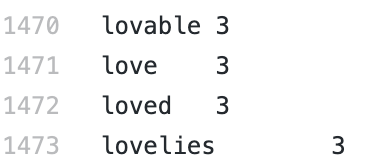

https://github.com/fnielsen/afinn/blob/master/afinn/data/AFINN-111.txt#L1474

In [48]:
afn = Afinn(emoticons = True)

In [49]:
afn.score("I love it")

3.0

In [50]:
for review, sentiment in zip(reviews[sample],sentiments[sample]):
    print("REVIEW:",review)
    print("SENTIMENT:",sentiment)
    print('Predicted Sentiment polarity:',afn.score(review))
    print('-'*60)

REVIEW: watched this one and the previous one several times. Like this movie lots and so did the kids! thanks so much
SENTIMENT: positive
Predicted Sentiment polarity: 4.0
------------------------------------------------------------
REVIEW: Typical ERB Mars series, which I find light reading. Not too much depth or thought provoking, but nice escape from everyday.
SENTIMENT: positive
Predicted Sentiment polarity: 1.0
------------------------------------------------------------
REVIEW: This overdone remake of the brilliant 1963 classic is sorely disappointing. If it had been released as an original movie with an original title, it would have worked. The special effects (though good) were too much for this movie to bare.
SENTIMENT: negative
Predicted Sentiment polarity: 5.0
------------------------------------------------------------


In [59]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in reviews]
predicted_sentiments = ['positive' if score >= 0.2 else 'negative' for score in sentiment_polarity]

In [60]:
## Evaluation
labels = ['negative','positive']
print(classification_report(sentiments,predicted_sentiments))
pd.DataFrame(confusion_matrix(sentiments, predicted_sentiments), index = labels,columns = labels)

              precision    recall  f1-score   support

    negative       0.67      0.81      0.73      2436
    positive       0.77      0.62      0.68      2565

   micro avg       0.71      0.71      0.71      5001
   macro avg       0.72      0.71      0.71      5001
weighted avg       0.72      0.71      0.71      5001



,negative,positive
negative,1966,470
positive,985,1580
